<a href="https://colab.research.google.com/github/Leriloe/MachineLearning-Python/blob/main/3_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style='color:blue'> <center>Unsupervised Learning</center> </span>
## **Chapter 3.** Dimensionality Reduction
#### by **Ivan Alducin**
<p><img src="https://truth-and-beauty.net/content/1-projects/33-multiplicity/_05-annotated.png" width="1250"/></p>

## Introducción

El <b>Análisis de Componentes Principales</b> es un método rápido y flexible de <i>Apendizaje no Supervisado</i> para la reducción de la dimensionalidad de los datos. Su comportamiento es más fácil de visualizar al observar un conjunto de datos bidimensionales.
Considere lo siguiente:

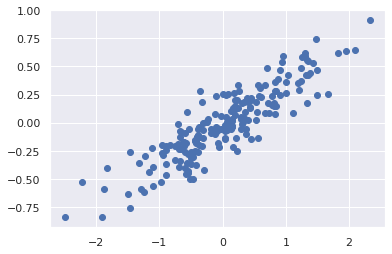

In [1]:
# Importa Numpy, Matplotlib y Seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión
sns.set()
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.show()

A simple vista, está claro que existe una relación casi lineal entre las variables <i>X</i> e <i>Y</i>.
Aquí, en lugar de intentar *predecir* los valores de y a partir de los valores de x, el problema es intentar conocer la *relación* entre estos valores. En el Análisis de Componentes Principales, esta relación se cuantifica encontrando una lista de los *ejes principales* en los datos y usando esos ejes para describir el conjunto de datos.
Usando el estimador `PCA` de Scikit-Learn, podemos calcular esto de la siguiente manera:

In [2]:
# Importa el modulo PCA de sklearn
from sklearn.decomposition import PCA

# Instancia un PCA de dos componentes
pca = PCA(n_components = 2)

# Ajusta a los datos de X
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [3]:
# Imprime los componentes del modelo
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [4]:
# Imprime la varianza explicada
print(pca.explained_variance_)

[0.7625315 0.0184779]


## Componentes y Varianza
<p>Para ver qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector y la "varianza explicada" para definir la longitud al cuadrado del vector. Estos vectores representan los <i>ejes principales</i> de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyectan sobre ese eje. La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.
    
Esta transformación de ejes de datos a ejes principales es una *transformación afín*, lo que básicamente significa que está compuesta por una traslación, rotación y escala uniforme. Si bien este algoritmo para encontrar componentes principales puede parecer solo una curiosidad matemática, resulta tener aplicaciones de gran alcance en el mundo del aprendizaje automático y la exploración de datos.</p>

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

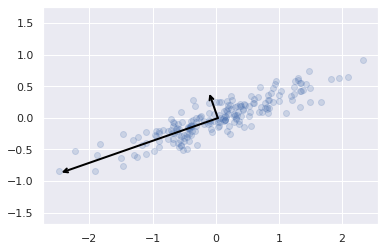

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Imprimir Grafico de Componentes
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

## High-dimensional
<p>Como ya hemos visto anteriormente el primer paso es comenzar por hacer un análisis exploratorio de mis datos. Esto mediante algunas tecnicas estadísticas como, por ejemplo, las distribuciones de ciertas variables o buscando correlaciones potenciales.
    
El problema hoy en día es que la mayoría de los conjuntos de datos tienen una gran cantidad de variables. En otras palabras, tienen un gran número de dimensiones a lo largo de las cuales se distribuyen los datos. La exploración visual de los datos puede convertirse en un desafío y, la mayoría de las veces, incluso prácticamente imposible de hacer manualmente. Sin embargo, esta exploración visual es increíblemente importante en cualquier problema relacionado con los datos. Por lo tanto, es clave comprender cómo visualizar conjuntos de datos de alta dimensión. Esto se puede lograr utilizando técnicas conocidas como reducción de dimensionalidad. Ya hemos visto una: <i>PCA</i>, pero también revisaremos otra técnica llamada <i>t-SNE</i>.</p>

In [6]:
# Importa Pandas

# Importa el archivo "MNIST.csv"
df = pd.read_csv('MNIST.csv')
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## MNIST
<p>La base de datos <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> es un repositorio de dígitos escritos a mano. Los dígitos se normalizaron en tamaño y se centraron en una imagen de tamaño fijo. Es una buena base de datos para las personas que desean probar técnicas de aprendizaje y métodos de reconocimiento de patrones en datos del mundo real mientras dedican un esfuerzo mínimo al preprocesamiento y formato.</p>

In [7]:
# Crea conjunto de variables independientes (dimensiones)
X = df.drop('label',axis=1)

# Crea la variable objetivo (label)
y = df['label']

In [8]:
# Guarda el nombre de las columnas del conjunto de variables independientes
cols = X.columns

<Figure size 432x288 with 0 Axes>

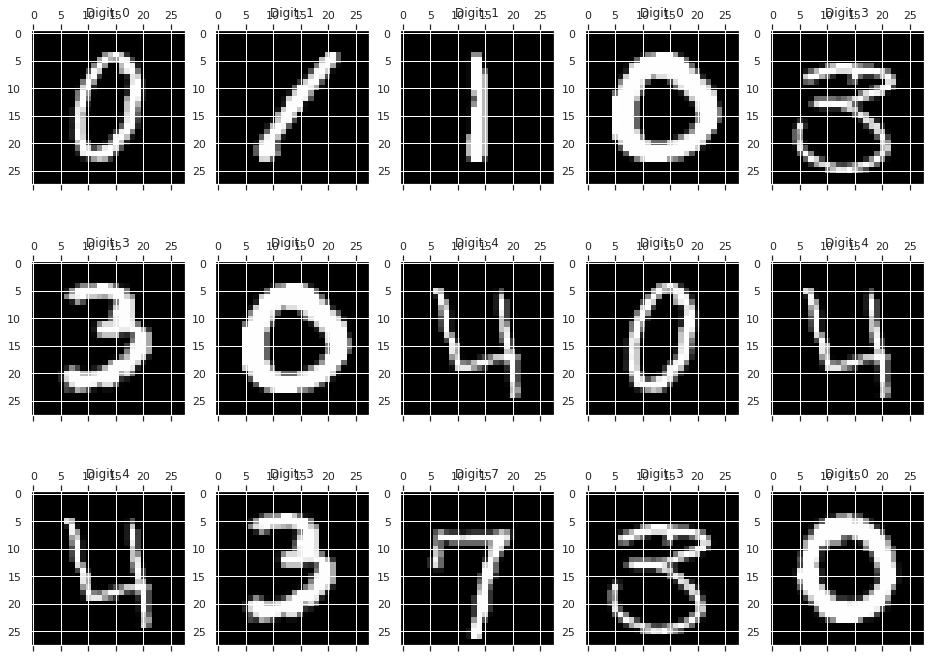

In [9]:
# Define una semilla aleatoria para poder reproducir los resultados
np.random.seed(100)

# Seleccionar una muestra aleatoria del conjunto de datos de la variable objetivo (Conviertelo a un arreglo)
subset = y.sample(15).to_numpy()

# Visualizar los digitos de la muestra
plt.gray()
fig = plt.figure(figsize=(16,12))
for i in range(0, len(subset)):
    ax = fig.add_subplot(3, 5, i+1, title="Digit: {}".format(str(df.loc[subset[i],'label'])) )
    ax.matshow(df.loc[subset[i], cols].values.reshape((28,28)).astype(float))
plt.show()

## PCA
<p>Ahora podemos empezar a pensar en cómo podemos realmente distinguir los <i>ceros</i> de los <i>unos</i>, los <i>unos</i> de los <i>dos</i> y así sucesivamente. Si fuera, por ejemplo, una oficina de correos, tal algoritmo podría ayudarte a leer y clasificar los sobres escritos a mano usando <i>Machine Learning</i> y con esto ahorrar tiempo operativo. Obviamente, hoy en día tenemos métodos muy avanzados para hacer esto, pero este conjunto de datos aún proporciona un muy buen campo de prueba para ver cómo y qué tan bien funcionan los métodos específicos para la reducción de dimensionalidad.
    
Las imágenes son esencialmente imágenes de 28 por 28 píxeles y, por lo tanto, tienen un total de 784 "dimensiones", cada una con el valor de un píxel específico.
Lo que podemos hacer es reducir drásticamente el número de dimensiones mientras tratamos de retener la mayor cantidad de "variación" en la información como sea posible. Aquí es donde llegamos a la reducción de dimensionalidad. La documentación oficial de <code>sklearn</code> la podrás enocntrar en el siguiente <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">link</a>.</p>

In [10]:
# Importa los modulos necesarios
from sklearn.decomposition import PCA

# Instancia un PCA con dos componentes
pca = PCA(n_components=2)

# Entrena el algoritmo
pca_result = pca.fit_transform(X.values)

# Define los componentes
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]

# Variación de cada componente
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09748938 0.07160266]


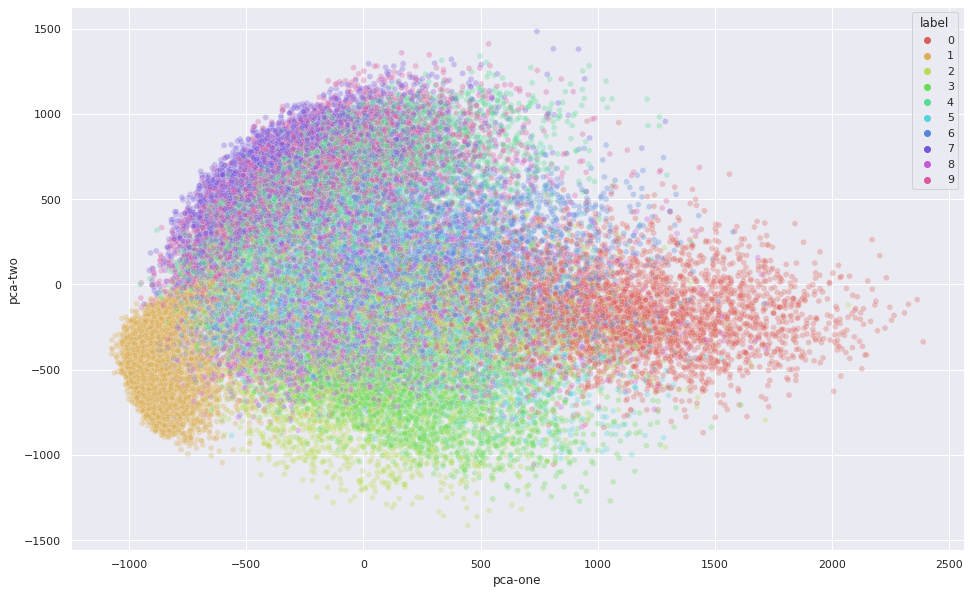

In [11]:
# Grafico PCA
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', 
    y='pca-two',
    hue='label',
    data=df,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

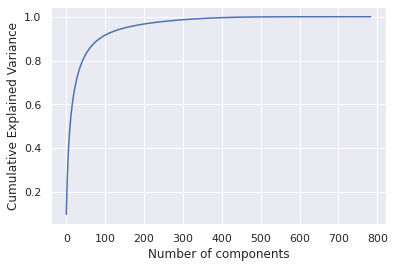

In [12]:
# Varianza explicada por el número de componentes
pca = PCA().fit(X.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance');

## t-SNE
<p>En el gráfico anterior, podemos ver que los dos componentes definitivamente contienen cierta información releveante, especialmente para ciertos dígitos, pero claramente no lo suficiente como para diferenciarlos a todos. Afortunadamente, existe otra técnica que podemos utilizar para reducir el número de dimensiones que puede resultar más útil.
    
<b>t-Distributed Stochastic Neighbor Embedding</b> (t-SNE) es otra técnica para la reducción de la dimensionalidad y es particularmente adecuada para la visualización de conjuntos de datos de alta dimensión. A diferencia de la PCA, no es una técnica determinista sino probablística. El <a href="https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf">documento de investigación</a> original describe el funcionamiento de t-SNE como: <i>“t-SNE minimiza la divergencia entre dos distribuciones: una distribución que mide las similitudes por pares de los objetos de entrada y una distribución que mide las similitudes por parejas de los puntos de baja dimensión correspondientes en la integración”</i></p>

In [13]:
# Importa los modulos necesarios
from sklearn.manifold import TSNE

# Para mejorar el rendimiento de nuestro procesador, vamos a correr el algoritmo con una muestra de 10,000
N = 10000

# Vamos a crear un subconjunto aleatorio con el tamaño definido de la muestra
subset = df.sample(N)

In [14]:
# Importar modulo time
import time

# Definir un cronometro (Vamos a medir el tiempo de procesamiento)
time_start = time.time()

# Instancia un t-SNE con 2 componentes
tsne = TSNE(n_components=2, 
            perplexity=40, 
            n_iter=300,
            verbose=1)

# Entrena el alogoritmo
tsne_results = tsne.fit_transform(subset.values)

# Vamos a medir el tiempo de procesamiento
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.219s...
[t-SNE] Computed neighbors for 10000 samples in 168.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 467.864480
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.168365
[t-SNE] KL divergence after 300 iterations: 2.811509
t-SNE done! Time elap

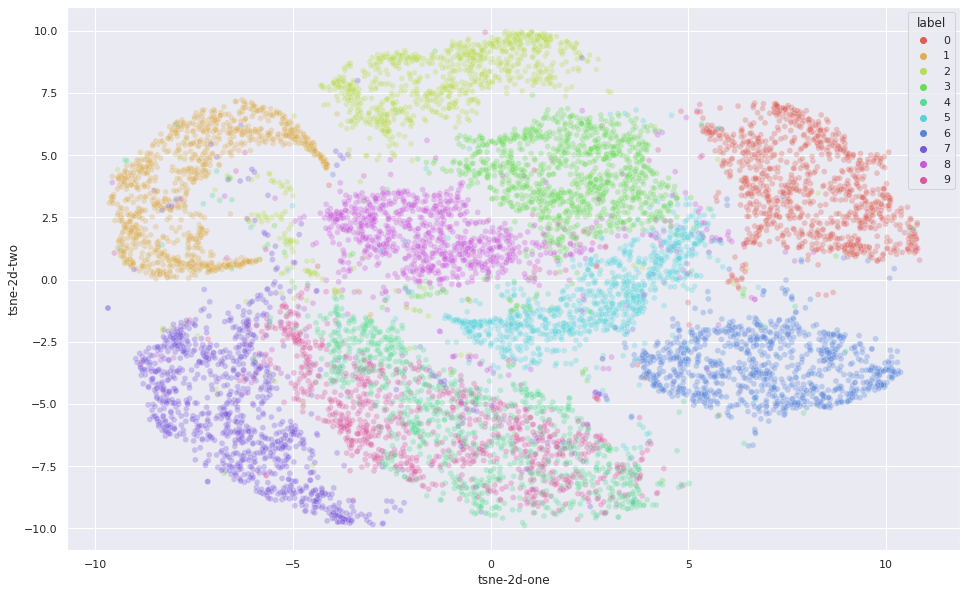

In [15]:
# Definimos los ejes
subset['tsne-2d-one'] = tsne_results[:,0]
subset['tsne-2d-two'] = tsne_results[:,1]

# Grafico t-SNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne-2d-one', 
    y='tsne-2d-two',
    hue='label',
    data=subset,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

## Capital Asset Pricing Model (CAPM)

El Modelo de fijación de precios de activos de capital (CAPM) es un marco famoso para fijar el precio de los rendimientos de un activo como una acción, con muchas conexiones interesantes con la teoría moderna de la cartera.

Antes de profundizar en los detalles del CAPM, es importante comprender la noción de activos libres de riesgo y el factor de mercado. Un activo libre de riesgo es esencialmente un activo que puede brindarle rendimientos prácticamente sin riesgo (por ejemplo, un bono del gobierno). En cambio, el factor de mercado monitorea el estado del mercado de valores en general en su conjunto y, a menudo, se mide a través de un índice como el S&P500. En términos generales, el mercado en general es más volátil / arriesgado que los bonos del gobierno, pero también proporciona más rendimientos a los inversores. Con esas definiciones en mente, veamos el concepto de Security Market Line (SML) de CAPM. En la práctica, SML descompone los rendimientos de una acción $r_i$ en tres factores principales:
- $r_f$: retorno sin riesgo
- $\beta_i * (r_m-r_f)$: rendimiento del factor de mercado
- $\epsilon_i$: retorno idiosincrásico

La intuición detrás de esta ecuación es que:

1. el rendimiento de una acción debe ser al menos igual al rendimiento del activo libre de riesgo (de lo contrario, ¿por qué asumir el riesgo adicional en primer lugar?)
2. el rendimiento del activo también se explica por el factor de mercado, que es capturado por el término ($r_M-r_f$) (mide el exceso de rendimiento del mercado con respecto al activo libre de riesgo) y $\beta_i$ (mide el grado al que el activo se ve afectado por el factor de mercado).
3. el rendimiento de una acción también se ve afectado por factores idiosincrásicos, que son factores específicos de la acción (por ejemplo, la publicación de ganancias de una acción afecta solo a esa acción individual, pero no al mercado en general).

In [16]:
!pip install yfinance
!pip install bs4

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=2ff19a3da7aee73ed08877cb7b8578848fd4b8770e909d28f56beb93b04489aa
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [17]:
# Importar librerías
import yfinance as yf
import bs4 as bs
import requests

# Web Scrapping de las empresas que pertenecen al S&P500
def extract_data_wikipedia():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    arr = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            arr.append(ticker.replace('\n','')) 
    return arr

sp500 = extract_data_wikipedia()
sp500[0:10]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES']

In [18]:
#Descargo los precios de cierre de las acciones de las S&P500
prices = yf.download(sp500,start='2020-01-01',end='2021-01-01', threads=False)['Adj Close']

[*********************100%***********************]  503 of 503 completed

1 Failed download:
- OGN: Data doesn't exist for startDate = 1577836800, endDate = 1609459200


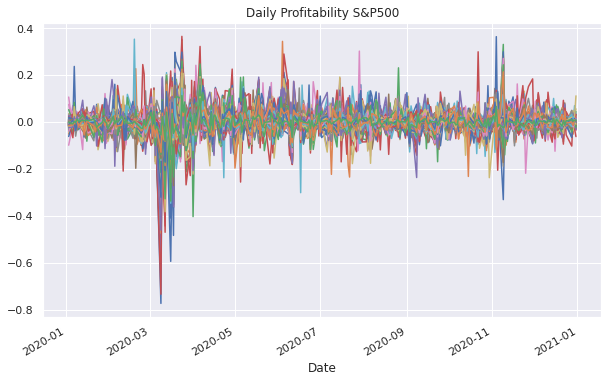

In [19]:
# Gráfico de Rendimientos diarios
rs = prices.apply(np.log).diff()
rs.plot(figsize=(10,6), 
        grid=True, 
        legend=0, 
        title='Daily Profitability S&P500')
plt.show()

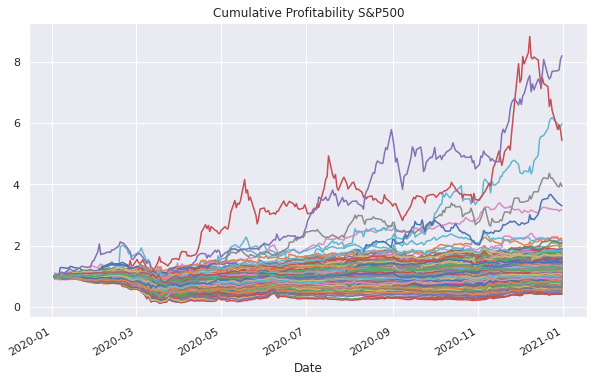

In [20]:
# Gráfico de Rendimientos acumulados
cum = rs.cumsum().apply(np.exp)
cum.plot(figsize=(10,6), 
         grid=True,
         legend=0,
         title='Cumulative Profitability S&P500')
plt.show()

## PCA y el Factor de Mercado

Los gráficos anteriores muestran los rendimientos diarios y los rendimientos acumulados de las 500 acciones de empresas en el S&P500 de todo el año 2020. La cantidad de datos puede parecer bastante abrumadora, así que procesémoslos a través de PCA calculando el primer componente principal de los rendimientos diarios. La siguiente figura muestra los valores del primer componente principal, que es esencialmente un vector de dimensión 500 que contiene un valor para cada una de las 500 acciones.

Hablando empíricamente, el factor de mercado es el principal impulsor de los rendimientos del mercado de valores, ya que tiende a explicar la mayoría de los rendimientos de cualquier acción en un día determinado. En otras palabras vamos a demostrar que: *Al aplicar PCA a los rendimientos diarios de las acciones, el primer componente principal se aproxima al factor de mercado.*

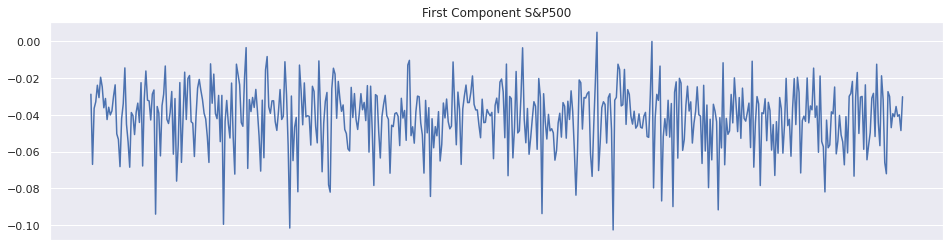

In [21]:
# Primer Componente PCA(1)
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
pc1.plot(xticks=[], 
         figsize=(16,4),
         title='First Component S&P500')
plt.show()

Recuerde que:
- El primer componente representa la combinación lineal de los datos de entrada que explica la mayor parte de la varianza, y 
- El principal impulsor de los rendimientos de las acciones es el factor general del mercado. Esto implica que si formulamos una cartera de acciones asignando el efectivo proporcionalmente al primer componente principal (es decir, una combinación lineal de los datos de entrada), podemos replicar los rendimientos del S&P500 aproximadamente (es decir, el principal impulsor de los rendimientos de las acciones).

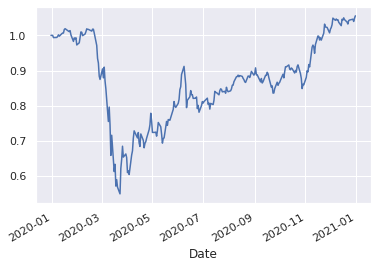

In [22]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

<i>El SPDR ETF Trust</i> (SPY) rastrea las 500 empresas del índice S&P500. Las empresas incluidas en el ETF son elegidas por un comité y, como resultado, las participaciones pueden diferir ligeramente del índice S&P500. El comité utiliza pautas para sus decisiones que incluyen liquidez, rentabilidad y equilibrio. El comité se reúne periódicamente para revisar el índice.

In [23]:
# Descarga de precios de cierre de las acciones del indicador SPY
spy_prices = yf.download("SPY", start='2020-01-01', end='2021-01-01', threads=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


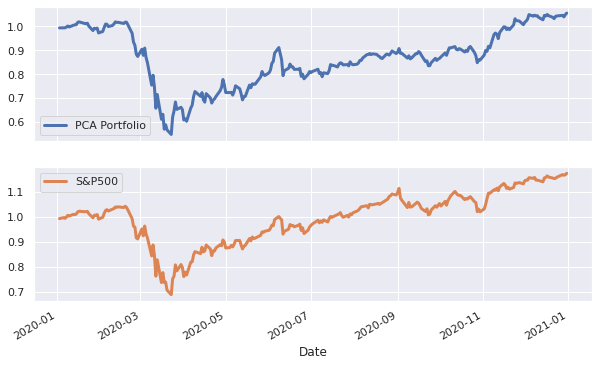

In [24]:
# Rendimiento diario del portafolio PCA vs S&P500
rs_df = pd.concat([myrs, spy_prices.apply(np.log).diff()], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

# Imprimir Gráfico 
rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, 
                                           figsize=(10,6), 
                                           grid=True, 
                                           linewidth=3);
plt.show()

Como se muestra en la figura anterior, nuestra cartera de PCA puede funcionar como un proxy del factor de mercado, que es el principal impulsor de los rendimientos de las acciones (<b>¡Y por lo tanto, explica la mayor parte de la variación!</b>). Tenga en cuenta que, aunque son similares, la cartera de PCA no replica exactamente el S&P500, ya que el S&P500 es un promedio ponderado de capitalización de mercado de las 500 acciones, mientras que las ponderaciones en la cartera de PCA están influenciadas por la varianza explicada.

Con PCA, podemos agrupar las empresas que se vieron más o menos afectadas por la pandemia de <i>COVID-19</i>, sin ningún conocimiento previo de sus fundamentos. Como probablemente sepan, 2020 fue un año complicado para el mercado de valores debido a la pandemia. Utilizando PCA, podemos analizar cómo esta pandemia afectó a las empresas de manera individual. Por ejemplo, veamos el primer componente principal y seleccionemos las acciones que tienen el mayor y menor peso, como se muestra a continuación:

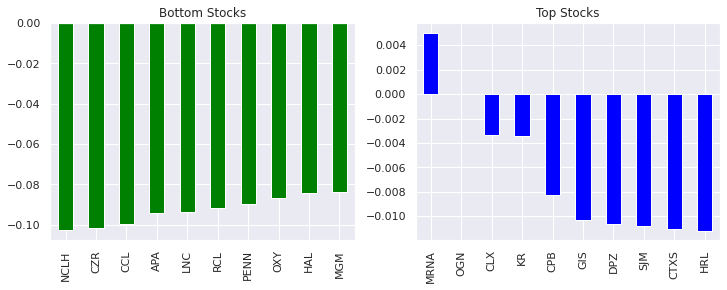

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Bottom Stocks')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Top Stocks')
plt.show()

## PCA vs S&P500

Por último, podemos formular una cartera ganadora que esté a lo largo de las 10 principales empresas de acuerdo con las ponderaciones de la PCA. Como se muestra en la figura siguiente, la cartera resultante habría tenido un desempeño significativamente mejor que el del mercado, ya que invirtió en empresas que realmente se beneficiaron de la pandemia.

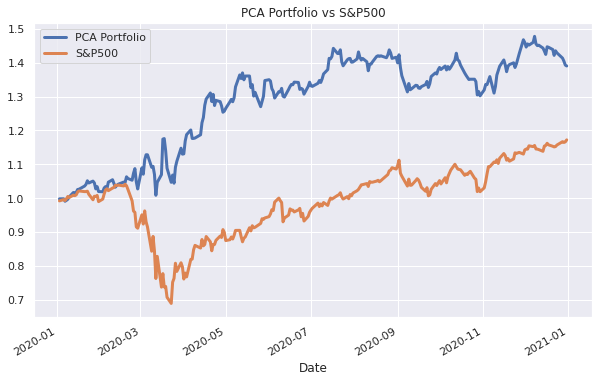

In [26]:
# Top 10 de Componenentes Principales
myrs = rs[pc1.nlargest(10).index].mean(1)

# Portafolio del Top 10 de PCA
plt.figure(figsize=(10,6))
myrs.cumsum().apply(np.exp).plot(grid=True, 
                                 linewidth=3)

# Portafolio deL Top 10 de S&P500
spy_prices.apply(np.log).diff().cumsum().apply(np.exp).plot(grid=True, 
                                                            linewidth=3)
plt.title('PCA Portfolio vs S&P500')
plt.legend(['PCA Portfolio', 'S&P500'])
plt.show()